In [4]:
# Get Iris dataset
import sklearn
print(sklearn.__version__)

from sklearn import datasets as ds
import numpy as np
import cmath
import matplotlib.pyplot as plt

1.5.2


In [ ]:
# Load Iris data
Iris = ds.load_iris()
    #Random weights I think
Xdata = Iris.data.astype(np.float32) 
Tdata = Iris.target.astype(np.float32)
D = len(Tdata)

# Split the Iris data into Train:Test = 100:50 training and testing datasets
Dtrain = int(D * 2 / 3)
Dtest = D - Dtrain
xtrain = []
ttrain = []
xtest = []
ttest = []

# Function to shuffle dataset. Randomly shuffle the dataset and distribute it into train and test sets.
def Shuffle_IrisData():
    global xtrain, ttrain, xtest, ttest
    index = np.random.permutation(range(D))
    xtrain = Xdata[index[0:Dtrain], :]
    ttrain = Tdata[index[0:Dtrain]]
    xtest = Xdata[index[Dtrain:D], :]
    ttest = Tdata[index[Dtrain:D]]
# Returns shuffled Iris data arrays.

# Convert 4-input data to 7-input data, with the remaining 3 inputs set to 0
def GetSevenInput(FourInput):
    input = [FourInput[0], FourInput[1], FourInput[2], FourInput[3], 0, 0, 0]
    return input.copy()
# Returns a vector with 7 inputs.

# Convert the target in Iris data to 3-output target vectors for actual output
def GetAnswerVector(tdata):
    dimension = 3
    answer = np.zeros(dimension)
    if tdata == 0:
        answer = [1, 0, 0]
    elif tdata == 1:
        answer = [0, 1, 0]
    elif tdata == 2:
        answer = [0, 0, 1]
    else:
        answer = [-100, -100, -100]
    return answer
# Returns the target converted to a vector.

# Run dataset shuffle function, obtain shuffled dataset, and output the test dataset
Shuffle_IrisData()
print(xtest)

# Set neural network parameters
N_weight = 7      # Number of neural network weights (7 inputs, 7 outputs)
N_Circle = 8      # 8 identical architectures
FlowerKind = 3
N_pickup = 20     # Number of samples
D_pickup = 10     # Number of data points per sample

# Function to compute mean squared error (input: system output matrix)
def GetAverageMSE(_outputMatrix):
    ratio_matrix = np.zeros((_outputMatrix.shape[0], FlowerKind))    # Initialize ratio matrix (?*3)
    MSE = np.zeros(N_pickup)    # Initialize mean squared error array; MSE is an array of length 20
    MSE_average = 0
    # Compute ratio matrix
    for i in range(_outputMatrix.shape[0]):
        for j in range(FlowerKind):
            ratio_matrix[i][j] = _outputMatrix[i][j] / (_outputMatrix[i][0] + _outputMatrix[i][1] + _outputMatrix[i][2])
    # Compute MSE for each dataset
    for i in range(_outputMatrix.shape[0]):
        # Train data?
        tvector = GetAnswerVector(ttrain[i])  # tvector is the target converted to an array
        MSE[i] = (ratio_matrix[i][0] - tvector[0]) ** 2 + (ratio_matrix[i][1] - tvector[1]) ** 2 + (ratio_matrix[i][2] - tvector[2]) ** 2
    return np.mean(MSE)   # Returns the average MSE.
# Returns the overall average MSE for each dataset.

# ---Circle---#
PI = np.pi
v_in = 1 / 6

def yout(x1, x2, v1, v2):
    y1 = (x1 * cmath.exp(1j * 2 * cmath.pi * v1) + 1j * (x2 * cmath.exp(1j * 2 * cmath.pi * v2))) / cmath.sqrt(2)
    y2 = (1j * x1 * cmath.exp(1j * 2 * cmath.pi * v1) + (x2 * cmath.exp(1j * 2 * cmath.pi * v2))) / cmath.sqrt(2)
    return y1, y2

# Function to define the Circle architecture
def Circle(x, v):
    x = GetSevenInput(x)
    # Layer 1
    y1_1, y1_2 = yout(x[0], x[1], v[0], v[1])
    # Layer 2
    y2_1, y2_2 = yout(x[2], x[3], v[2], v[3])
    # Layer 3
    y3_1, y3_2 = yout(x[4], x[5], v[4], v[5])
    # Layer 4
    y4_1, y4_2 = yout(y1_2, y2_1, v_in, v_in)
    # Layer 5
    y5_1, y5_2 = yout(y2_2, y3_1, v_in, v_in)
    # Layer 6
    y6_1, y6_2 = yout(y3_2, v[6], v_in, v[6])
    # Layer 7
    y7_1, y7_2 = yout(y1_1, y4_1, v_in, v_in)
    # Layer 8
    y8_1, y8_2 = yout(y4_2, y5_1, v_in, v_in)
    # Layer 9
    y9_1, y9_2 = yout(y5_2, y6_1, v_in, v_in)
    # Layer 10
    y10_1, y10_2 = yout(y7_2, y8_1, v_in, v_in)
    # Layer 11
    y11_1, y11_2 = yout(y8_2, y9_1, v_in, v_in)
    # Layer 12
    y12_1, y12_2 = yout(y9_2, y6_2, v_in, v_in)
    # Layer 13
    y13_1, y13_2 = yout(y7_1, y10_1, v_in, v_in)
    # Layer 14
    y14_1, y14_2 = yout(y10_2, y11_1, v_in, v_in)
    # Layer 15
    y15_1, y15_2 = yout(y11_2, y12_1, v_in, v_in)
    # Layer 16
    y16_1, y16_2 = yout(y13_2, y14_1, v_in, v_in)
    # Layer 17
    y17_1, y17_2 = yout(y14_2, y15_1, v_in, v_in)
    # Layer 18
    y18_1, y18_2 = yout(y15_2, y12_2, v_in, v_in)

    return [y13_1, y16_1, y16_2, y17_1, y17_2, y18_1, y18_2]

# Function to compute output values (execute 8 full Circles)
def GetOutput(_input, _weight, _time, _beforeOutput):
    _output = np.zeros(N_weight)  # Initialize output array of size 7
    for i in range(N_Circle - _time):  # _time is the number of completed Circles
        nowCircle = i + _time   # Current loop iteration = current Circle + completed Circles
        if i == 0 and nowCircle == 0:
            _output = Circle(GetSevenInput(_input), _weight[nowCircle])
        elif i == 0 and nowCircle != 0:
            _output = Circle(GetSevenInput(_beforeOutput[nowCircle - 1]), _weight[nowCircle])
            print('Intermediate')
        else:
            _output = Circle(_output, _weight[nowCircle])
    return [abs(_output[0])**2, abs(_output[1])**2, abs(_output[2])**2]
# Returns the squares of the first three outputs of the seven outputs.

# Function to compute multiple output values
def GetOutput_10(_IrisData, _weight, _time, _beforeOutput):
    _outputMatrix = np.zeros((D_pickup, FlowerKind))  # Initialize output matrix (10*3)
    _iris10 = np.zeros((10, 4)) 
    _iris10[:D_pickup] = np.array(_IrisData[:D_pickup])
    for i in range(D_pickup):
        _outputMatrix[i] = GetOutput(_iris10[i], _weight, _time, _beforeOutput)
    return _outputMatrix
# Returns a 10*3 matrix, where each row corresponds to the output squared values for each of the first 10 IrisData rows.


pickup0
pickup1
pickup2
pickup3
pickup4
pickup5
pickup6
pickup7
pickup8
pickup9
pickup10
pickup11
pickup12
pickup13
pickup14
pickup15
pickup16
pickup17
pickup18
pickup19


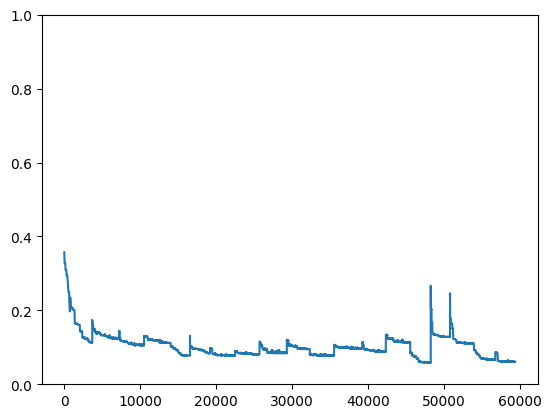

[[ 0.56348151  1.00190776  0.31304913  1.06834122  0.25608711  0.81205803
   0.71140902]
 [ 0.37182888  0.64300459  0.25012456  0.66045196  0.90840197  0.65141827
   0.35071551]
 [ 0.51113276 -0.39032733  0.02634904  0.46346839  0.83233079  0.8491825
   0.52412776]
 [ 0.85193769  0.34542175  0.77594287  0.49846186  0.95092307  0.85331807
   0.04471068]
 [ 0.40619298  0.1090635   0.25037203  0.80859811  0.70999303  0.73241086
   0.18724685]
 [ 0.52297442  1.06034702  0.07866538  0.70491968  0.9689569   0.44579104
   0.29660021]
 [ 0.72297094 -0.21735902  0.51647693  0.81103238  0.82559261  0.44262854
   0.84055719]
 [ 0.50786594  0.25287769  0.04642947  0.82534268  0.86643891  0.72809034
   0.54216411]]
CSV file 'output.csv' has been written with the data.


In [ ]:
# Main code
MSEav_Array = []  # Array to store average MSE values
_outputLast = [0] * 7
input = GetSevenInput(Xdata[0])  # Initialize the first row of Xdata, converted to 7 inputs
step = 0.01
N_changeweight = 100  # Number of weight changes

changed_weight = np.random.rand(N_Circle, N_weight)  # Weight change matrix (does not participate in loops, but is modified within them)
output_eachCircle = np.zeros((N_Circle, D_pickup, N_weight), dtype=np.complex128)

for _pickuped in range(N_pickup):  # Loop 20 times
    Shuffle_IrisData()  # Shuffle the dataset
    print("pickup" + str(_pickuped))  # Output the current loop iteration
    for _circle in range(N_Circle):  # Loop 8 times (8 layers)
        for _weight in range(N_weight):  # Loop 7 times (7 inputs/outputs)
            for i in range(N_changeweight):  # Loop 100 times (number of weight changes)
                plusMSE = 0
                minusMSE = 0
                plusMat = changed_weight.copy()  # Copy weight change matrix (8*7)
                plusMat[N_Circle - 1 - _circle][_weight] += step  # Increase by one step
                minusMat = changed_weight.copy()  # Copy weight change matrix (8*7)
                minusMat[N_Circle - 1 - _circle][_weight] -= step  # Decrease by one step
                outputPlus = GetOutput_10(xtrain, plusMat, 0, output_eachCircle)
                outputMinus = GetOutput_10(xtrain, minusMat, 0, 0)
                plusMSE = GetAverageMSE(outputPlus)
                minusMSE = GetAverageMSE(outputMinus)

                # Check which MSE average is smaller
                if abs(plusMSE - minusMSE) < 0.0001:
                    break
                if plusMSE > minusMSE:
                    changed_weight = minusMat.copy()
                    MSEav_Array.append(minusMSE)
                elif plusMSE < minusMSE:
                    changed_weight = plusMat.copy()
                    MSEav_Array.append(plusMSE)

# Plot the results
plt.ylim(ymin=0)
plt.plot(MSEav_Array)
plt.show()

print(changed_weight)

In [ ]:
# Save to CSV
import csv
filename = 'output.csv'
data = []
for i in range(len(MSEav_Array)):
    data.append(MSEav_Array[i].tolist())
_index = 1
with open(filename, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for row in data:
        csvwriter.writerow([_index, row])
        _index += 1

print(f"CSV file '{filename}' has been written with the data.")